# Keras Cheatsheet

A **structured reference** for building, training, and evaluating models efficiently.

---

##  Model Creation

### Sequential API

```python
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
```

---

## Layer Parameters

### `Dense`
- `units`: Number of neurons.
- `activation`: `'relu'`, `'sigmoid'`, `'tanh'`, etc.
- `input_shape`: Shape of **one input sample** `(features,)`.

### `Dropout`
- `rate`: Fraction of input units to drop (e.g., `0.5`).

---

##  Compile Parameters

```python
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
```

### Key:
- `optimizer`: `'sgd'`, `'adam'`, `'rmsprop'`, or custom:
  ```python
  keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  ```
- `loss`:
    - Classification:
        - Binary: `'binary_crossentropy'`
        - Multi-class: `'categorical_crossentropy'`
    - Regression:
        - `'mse'`, `'mae'`
- `metrics`: `'accuracy'`, `'mae'`, or custom.

---

## Fit Parameters

```python
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)
```

### Key:
- `epochs`: Full dataset passes.
- `batch_size`: Samples per update.
- `validation_split`: Fraction for validation.
- `shuffle`: Whether to shuffle data each epoch.
- `verbose`: `0` (silent), `1` (progress bar), `2` (per-epoch line).

---

##  Evaluate

```python
loss, acc = model.evaluate(X_test, y_test)
```

---

##  Predict

```python
predictions = model.predict(X_new)
```

---

##  Save & Load

```python
model.save('model.h5')
model = keras.models.load_model('model.h5')
```

---

##  Useful Callbacks

```python
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(..., callbacks=callbacks)
```

---

##  Common Activation Functions
| Activation | Purpose |
|------------|---------|
| `'relu'` | Fast, non-linear |
| `'sigmoid'` | 0-1 output, binary classification |
| `'tanh'` | -1 to 1 output |
| `'softmax'` | Probabilities for multi-class |

---

## Common Optimizers

| Optimizer | Notes |
|-----------|-------|
| `'sgd'` | Stochastic Gradient Descent |
| `'adam'` | Adaptive learning, commonly used |
| `'rmsprop'` | Good for RNNs |

---

##  Loss Functions

| Task | Loss |
|------|------|
| Binary Classification | `'binary_crossentropy'` |
| Multi-class Classification | `'categorical_crossentropy'` |
| Regression | `'mse'`, `'mae'` |

---

## ✅ Summary

- Use **Sequential API** for straightforward models.
- Use **Dense layers with appropriate activation**.
- Compile with **optimizer, loss, and metrics**.
- Fit with **epochs, batch_size, validation_split**.
- Use `history.history` for curves.

---


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])


In [ ]:
model = Sequential()
model.add(Dense(4,activation='sigmoid',input_dim=2)) #hidden layer
model.add(Dense(1,activation='sigmoid',input_dim=4))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [ ]:
history = model.fit(X,y,epochs=5000,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 - 0s - 35ms/step - binary_accuracy: 1.0000 - loss: 0.0427
Epoch 2502/5000
1/1 - 0s - 59ms/step - binary_accuracy: 1.0000 - loss: 0.0426
Epoch 2503/5000
1/1 - 0s - 36ms/step - binary_accuracy: 1.0000 - loss: 0.0426
Epoch 2504/5000
1/1 - 0s - 60ms/step - binary_accuracy: 1.0000 - loss: 0.0426
Epoch 2505/5000
1/1 - 0s - 37ms/step - binary_accuracy: 1.0000 - loss: 0.0425
Epoch 2506/5000
1/1 - 0s - 36ms/step - binary_accuracy: 1.0000 - loss: 0.0425
Epoch 2507/5000
1/1 - 0s - 41ms/step - binary_accuracy: 1.0000 - loss: 0.0425
Epoch 2508/5000
1/1 - 0s - 61ms/step - binary_accuracy: 1.0000 - loss: 0.0424
Epoch 2509/5000
1/1 - 0s - 65ms/step - binary_accuracy: 1.0000 - loss: 0.0424
Epoch 2510/5000
1/1 - 0s - 50ms/step - binary_accuracy: 1.0000 - loss: 0.0424
Epoch 2511/5000
1/1 - 0s - 58ms/step - binary_accuracy: 1.0000 - loss: 0.0423
Epoch 2512/5000
1/1 - 0s - 37ms/step - binary_accuracy: 1.0000 - loss: 0.0423
Epoch 2513/50

In [ ]:
final_acc = model.evaluate(X,y,verbose=0)
print(final_acc)

[0.00885310210287571, 1.0]


In [ ]:
print(f"Final Loss: {final_acc[0]:.4f}, Final Accuracy: {final_acc[1]*100:.2f}%")

Final Loss: 0.0089, Final Accuracy: 100.00%


In [ ]:
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[0.03212965]
 [0.90494955]
 [0.9085522 ]
 [0.1303181 ]]


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


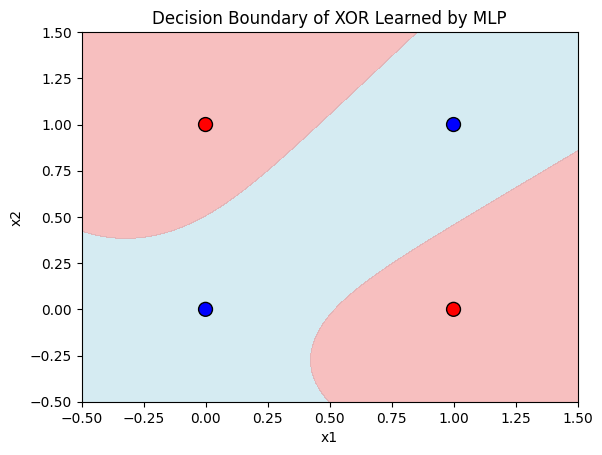

In [ ]:
import matplotlib.pyplot as plt
# Create a grid for visualization
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
preds = preds.reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap='bwr', edgecolor='k', s=100)
plt.title("Decision Boundary of XOR Learned by MLP")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
